# 예금 상품 가입 예측(bank analysis)

## 문제 상황  

최근 주식, 코인 투자가 열풍이 불면서 A은행의 정기예금 가입자가 감소하고 있다. 정기예금 가입률이 높았을 때는 Mass 마케팅 형식으로 홍보를  
해도 투자 대비 효율이 좋았지만 현재는 가입률이 떨어지고 있기 때문에 마케팅 비용 투자 대비 효율이 감소하고 있는 상황이다. 마케팅 비용을  
줄이기 위해 정기예금 가입 가능성이 높은 고객군을 추출하고 타겟 마케팅을 수행하고자 한다.

## 문제 해결 프로세스  

1. 문제정의

- 정기예금 가입자 감소, 마케팅 비용 투자 대비 효율 저조  

2. 기대효과

- 정기예금 가입률 증가, 마케팅 비용 투자 대비 효율 증대  

3. 해결방안

- 정기예금 가입 가능성이 높은 타겟 고객군 추출 및 대상 마케팅  

4. 성과측정

- 대조군 대비 타겟 고객군 정기예금 가입률

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C:/Users/USER/Desktop/Practice Project/예금 상품 가입 예측/예금 상품 가입 예측.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### 변수 해석 3가지  

1. 결측치 존재 여부

- 전체 데이터에서 결측치가 존재하지 않는다.

- 만약, 결측치가 존재했다면 전체 데이터의 약 5%정도 미만의 개수는 제거해도 좋다.

- 결측치를 대체하는 경우, object형태는 최빈값으로 대체하고, int64 or float64형태는 평균으로 대체하거나 KNN을 사용할 수 있다.  

2. 데이터 타입 설명

- object형태 11개, int64형태 5개, float64형태 5개로 총 21개의 변수가 존재한다.  

3. 컬럼 설명

- age : 나이
- jop : 직업
- marital : 결혼
- education : 교육
- default: 신용카드
- housing : 주택
- loan : 대출
- contact : 연락처
- month : 마지막 연락 월
- dat_of_week : 마지막 연락 요일
- duration : 통화시간
- campaign : 캠페인 기간동안 고객연락횟수
- pdays : 이전 캠페인 연락 후 지난 일
- previous : 현재 캠페인 전에 연락횟수
- poutcome : 이전 마케팅 결과
- emp.var.rate : 고용 변동률
- cons.price.idx : 소비자 물가 지수
- cons.conf.idx : 소비자 신뢰 지수
- euribor3m : 유리보 3개월 비율
- nr.employed : 직원수
- y : 정기예금가입여부

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


우선 describe로 이상치를 판단하기 위해서는 mean, min, max 값을 확인하는 것이 좋다. mean과 min, mean과 max 값이 std에 비해 한참 차이가 난다면, 이상치가 있을 가능성이 높다. 이러한 이상치를 정확히 판단하기 위해서는 아래와 같이 boxplot으로 시각화하여 보는 것이 정확하다.

In [56]:
df_n = df.select_dtypes(exclude = 'object')

In [8]:
outlier = pd.melt(df_n, var_name = '이상치 탐색 변수', value_name = '이상치 탐색 값')
outlier

,이상치 탐색 변수,이상치 탐색 값
0,age,56.0
1,age,57.0
2,age,37.0
3,age,40.0
4,age,56.0
...,...,...
411875,nr.employed,4963.6
411876,nr.employed,4963.6
411877,nr.employed,4963.6
411878,nr.employed,4963.6


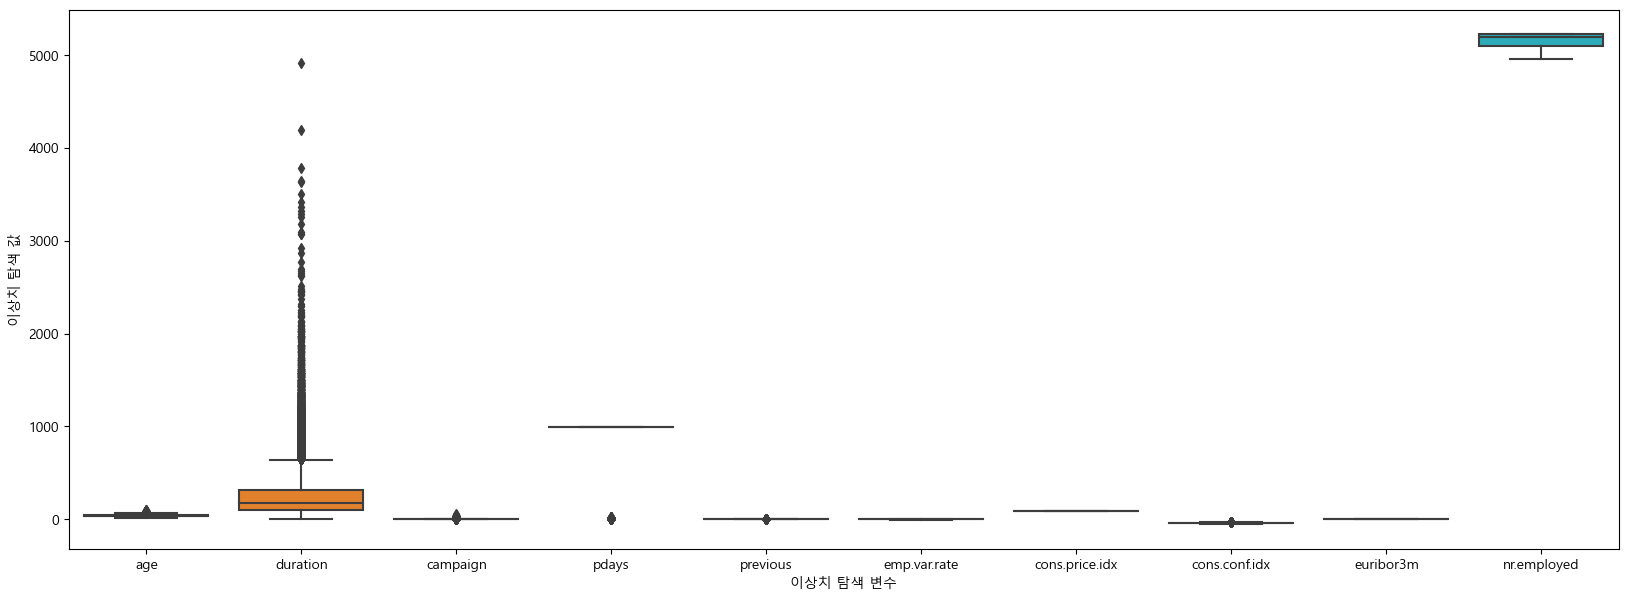

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc("font", family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (20,7))
sns.boxplot(x = '이상치 탐색 변수', y = '이상치 탐색 값', data = outlier)
plt.xticks(range(10), df_n.columns)
plt.show()

이상치를 탐색하기 위해서 수치형 변수들만 선택해서 boxplot으로 시각화하였다. 이상치의 값이 연속적으로 나타나면, 보통 의미있는 값일 확률이 높기 때문에 따로 제거하거나 대체하지 않고, pdays 변수처럼 눈에 띄는 이상치가 있을 경우에는 보통 제거하거나 대체하는 경우가 많다. 하지만, pdays는 '이전 캠페인 연락 후 지난 일'을 의미하므로 이상치가 있을 확률이 낮다고 판단하여 그대로 둔다.(예를 들어, Age 변수가 999값이 있으면 제거하거나 대체하는 것이 옳다.)

In [11]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [12]:
print("평균 정기예금 가입률 : ", (4640 / (36548+4640))*100)

평균 정기예금 가입률 :  11.265417111780131


In [19]:
df_c = df.select_dtypes(include = 'object')
df_c

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


### 범주형 변수에 따른 종속변수(예금 가입 여부)

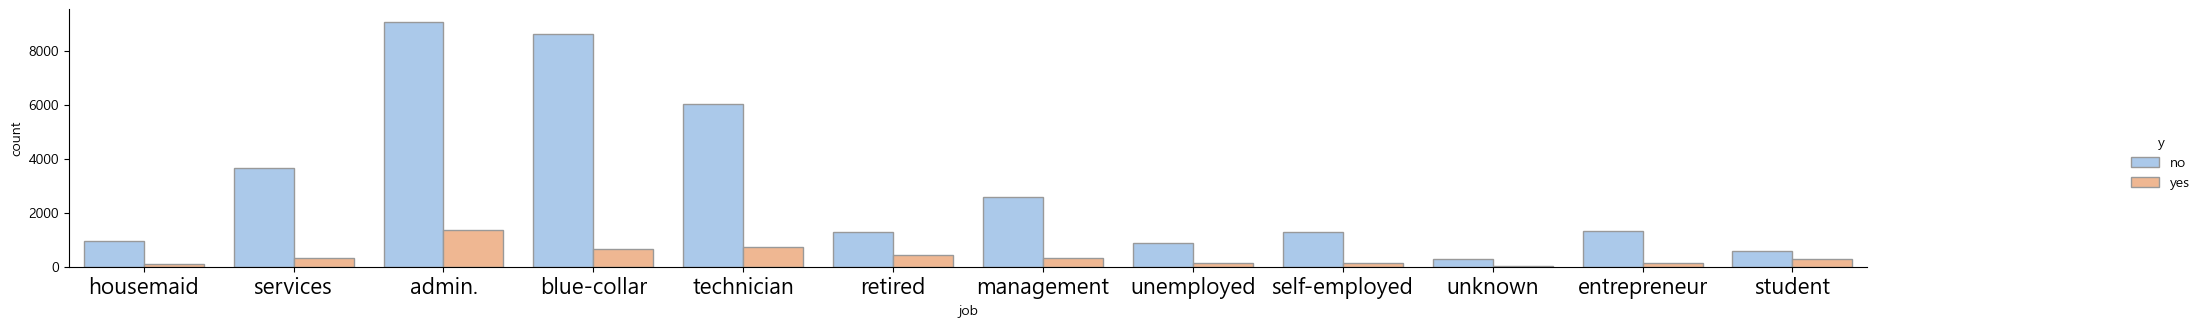

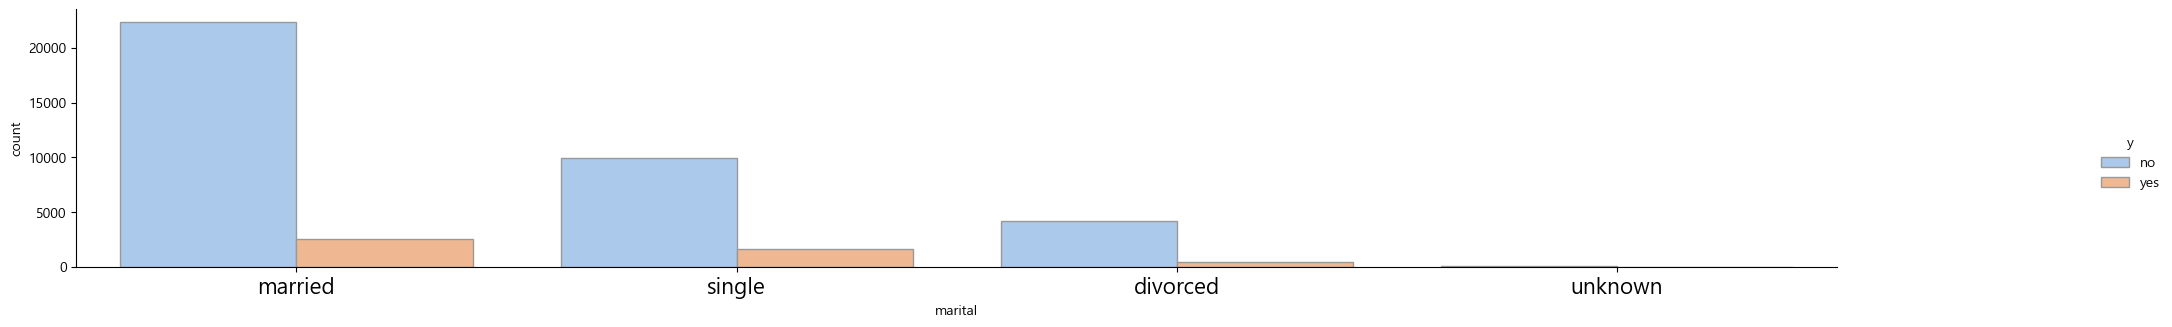

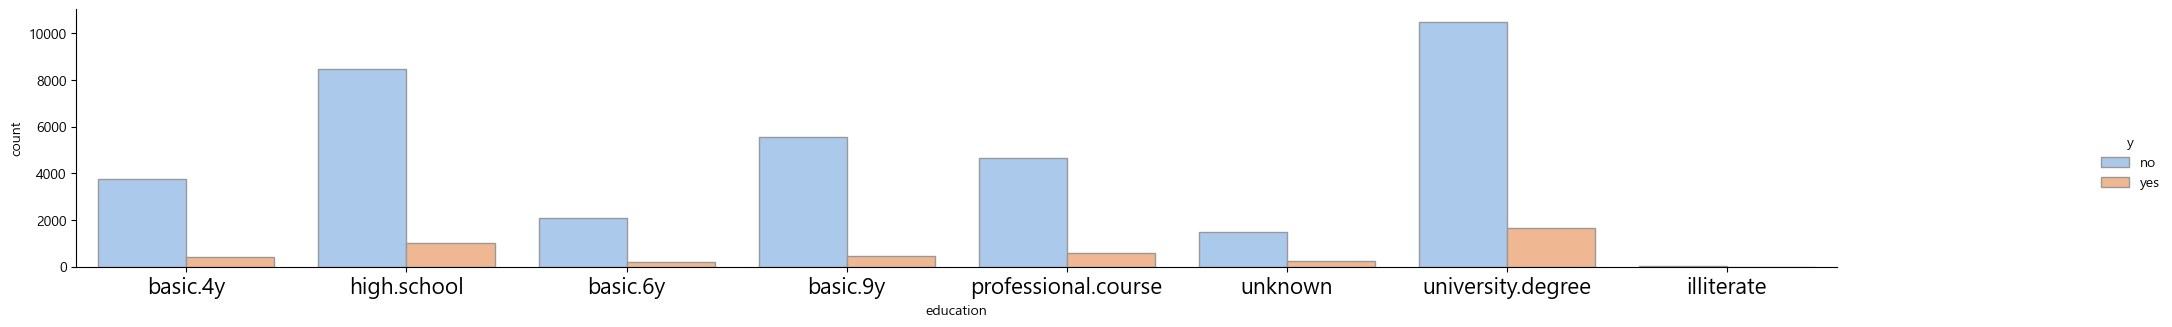

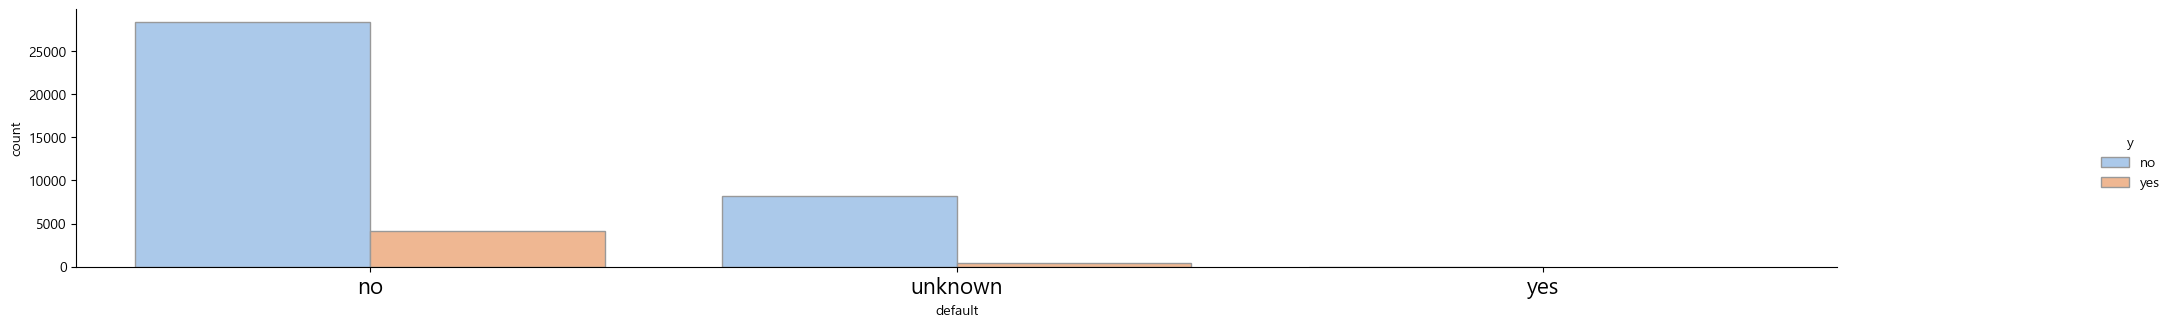

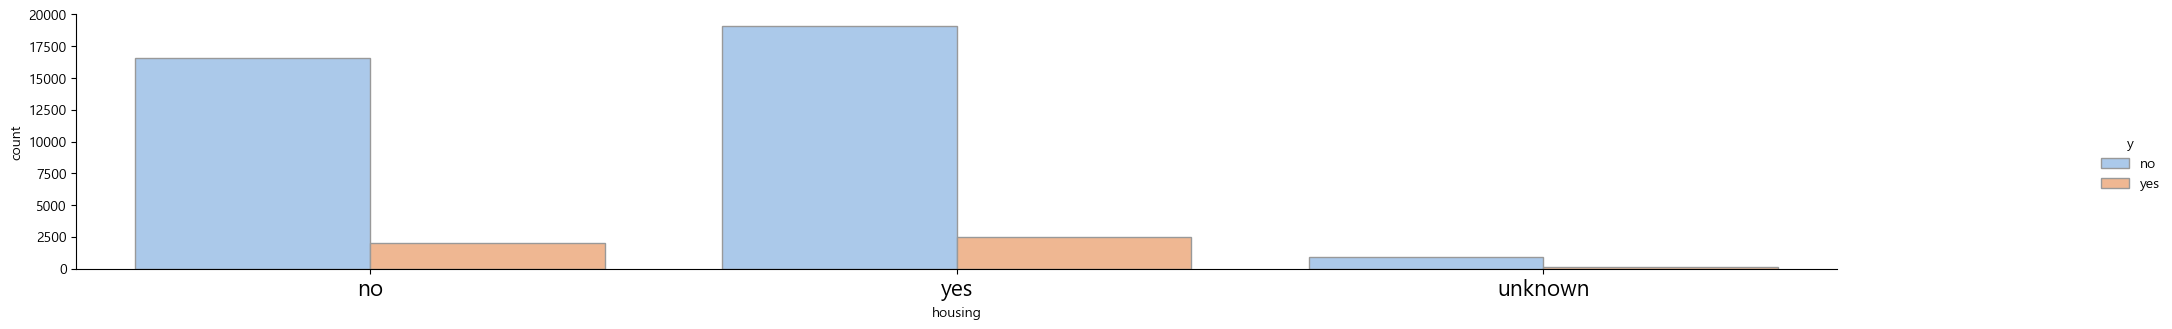

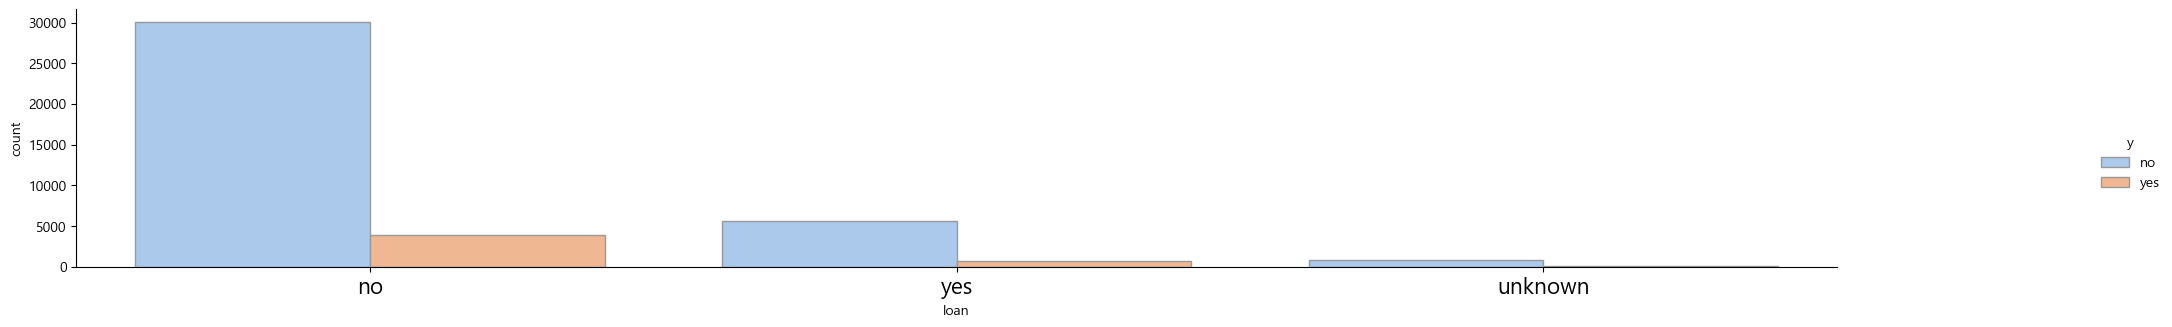

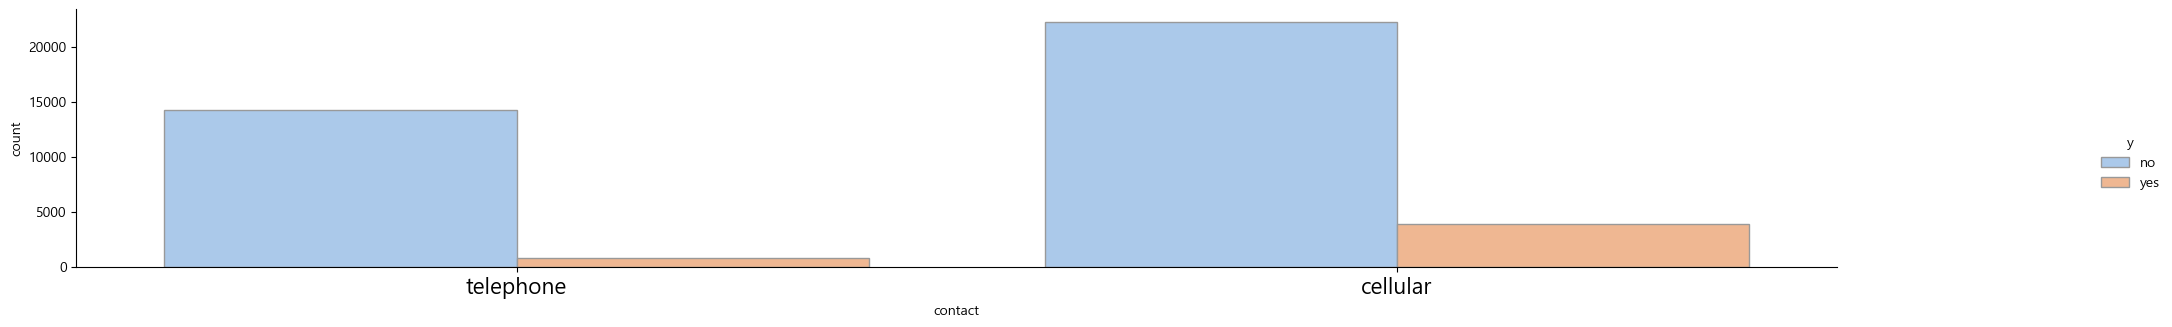

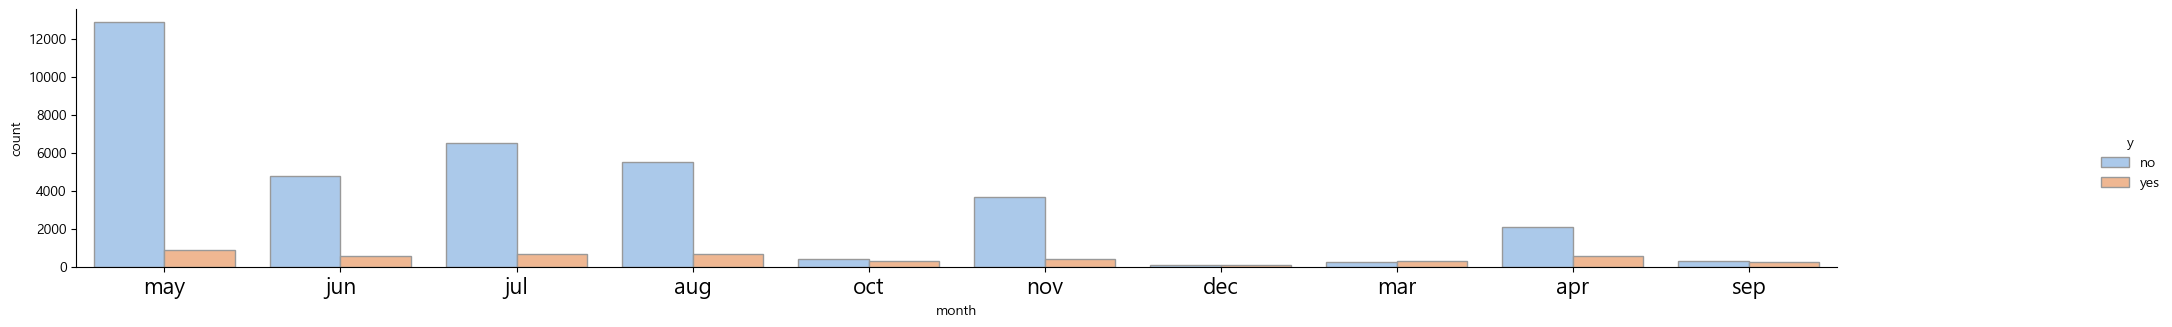

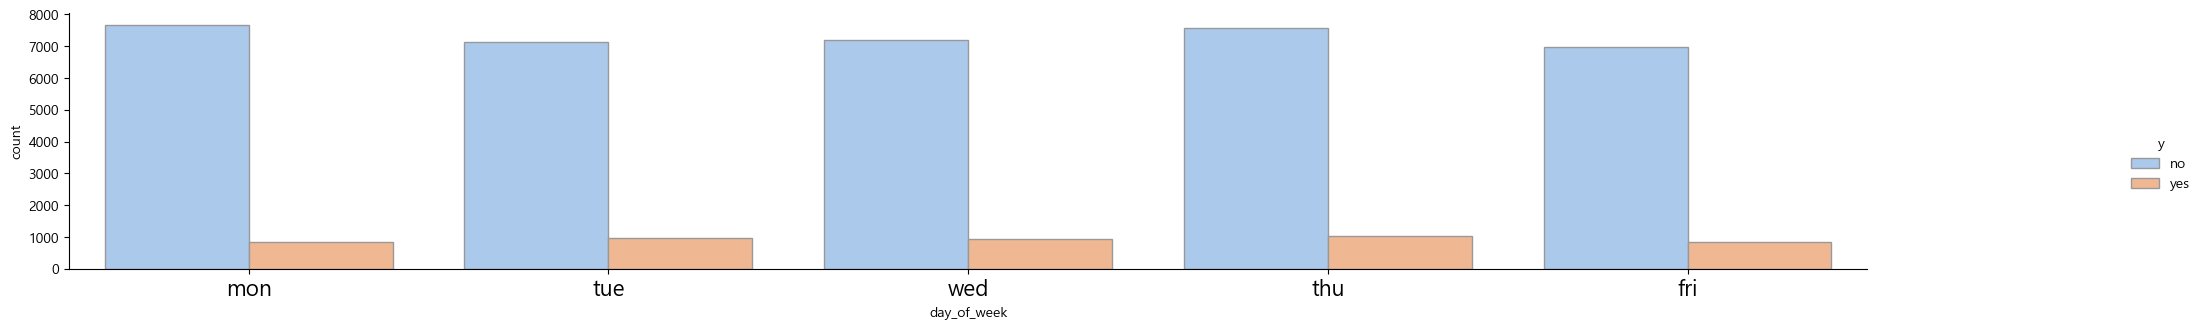

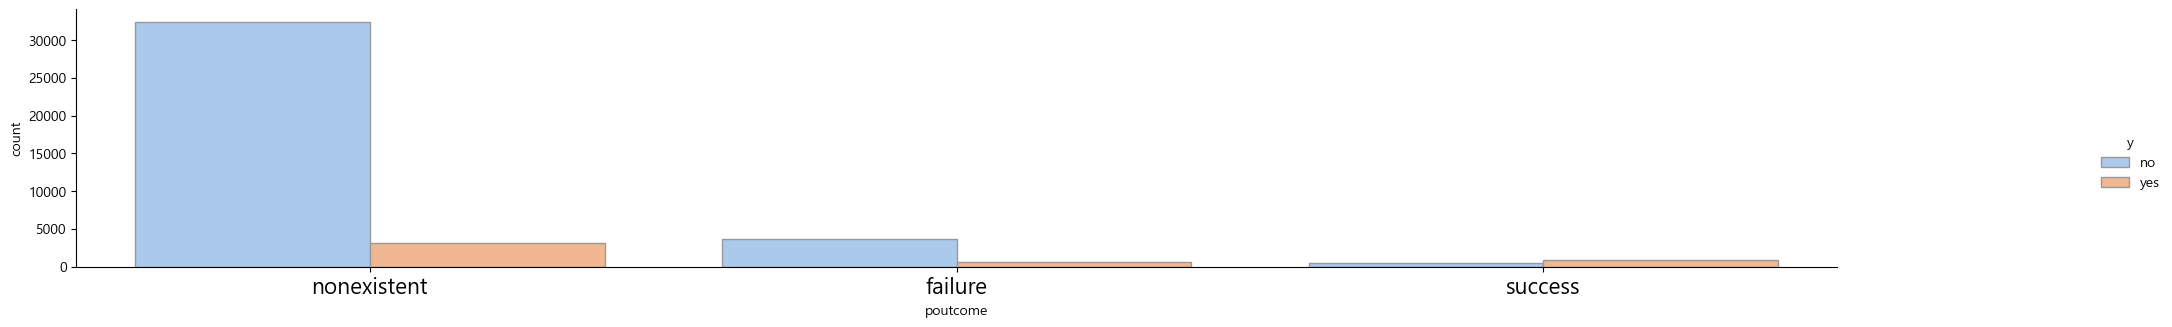

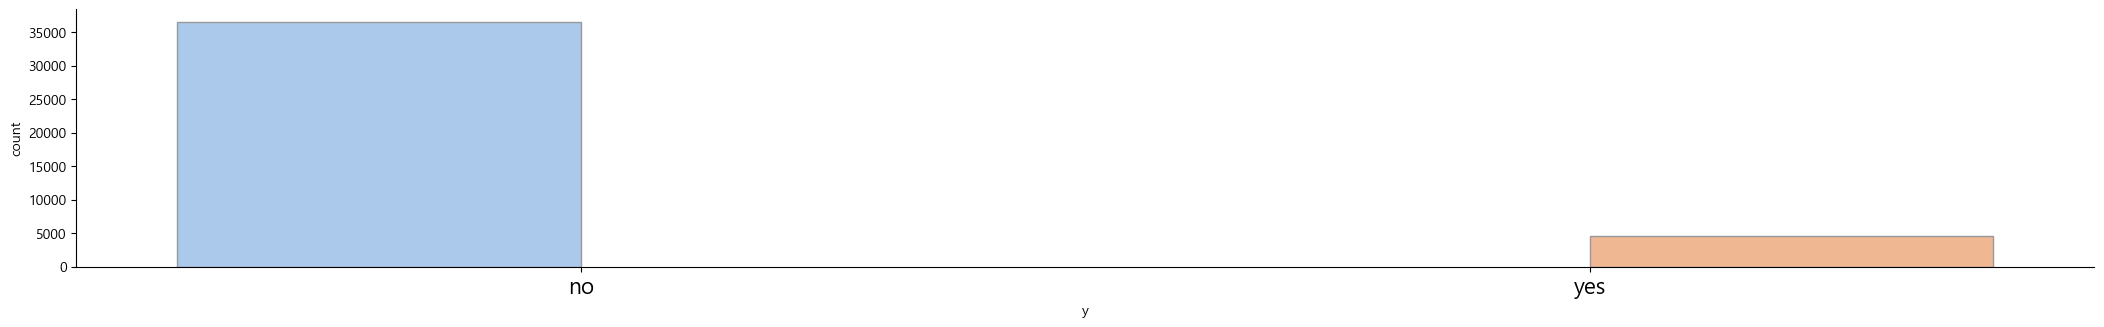

In [21]:
for i in df_c :
    sns.catplot(x=i, hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
    plt.gcf().set_size_inches(25, 3);
    plt.xticks(fontsize=16);

대체로 예금 가입비율이 변수의 특성별로 비슷한 걸 확인할 수 있다

## Rule base 기반 상품 가입 예측

In [22]:
df_job = pd.DataFrame(df['y'].groupby(df['job']).value_counts())
df_job.columns = ['cnt']
df_job = df_job.reset_index()
df_job.head()

,job,y,cnt
0,admin.,no,9070
1,admin.,yes,1352
2,blue-collar,no,8616
3,blue-collar,yes,638
4,entrepreneur,no,1332


위의 데이터프레임은 직업에 따른 정기예금 가입률을 비교하기 위해 만들었다

In [23]:
df_job = pd.pivot_table(df_job,        
                     index = 'job',    
                     columns = 'y',    
                     values = 'cnt')    

df_job = df_job.reset_index()
df_job.head()

y,job,no,yes
0,admin.,9070,1352
1,blue-collar,8616,638
2,entrepreneur,1332,124
3,housemaid,954,106
4,management,2596,328


In [24]:
df_job['sign_ratio'] =   round((df_job['yes'] / (df_job['yes'] + df_job['no'])) * 100,1)
df_job

y,job,no,yes,sign_ratio
0,admin.,9070,1352,13.0
1,blue-collar,8616,638,6.9
2,entrepreneur,1332,124,8.5
3,housemaid,954,106,10.0
4,management,2596,328,11.2
5,retired,1286,434,25.2
6,self-employed,1272,149,10.5
7,services,3646,323,8.1
8,student,600,275,31.4
9,technician,6013,730,10.8


새로운 변수 'sign_ratio'라는 변수를 만들어 "round((df_job['yes'] / (df_job['yes'] + df_job['no'])) * 100,1)" 식에 따라서 직업에 따른 정기예금 가입률을 의미하는 비율을 입력한다

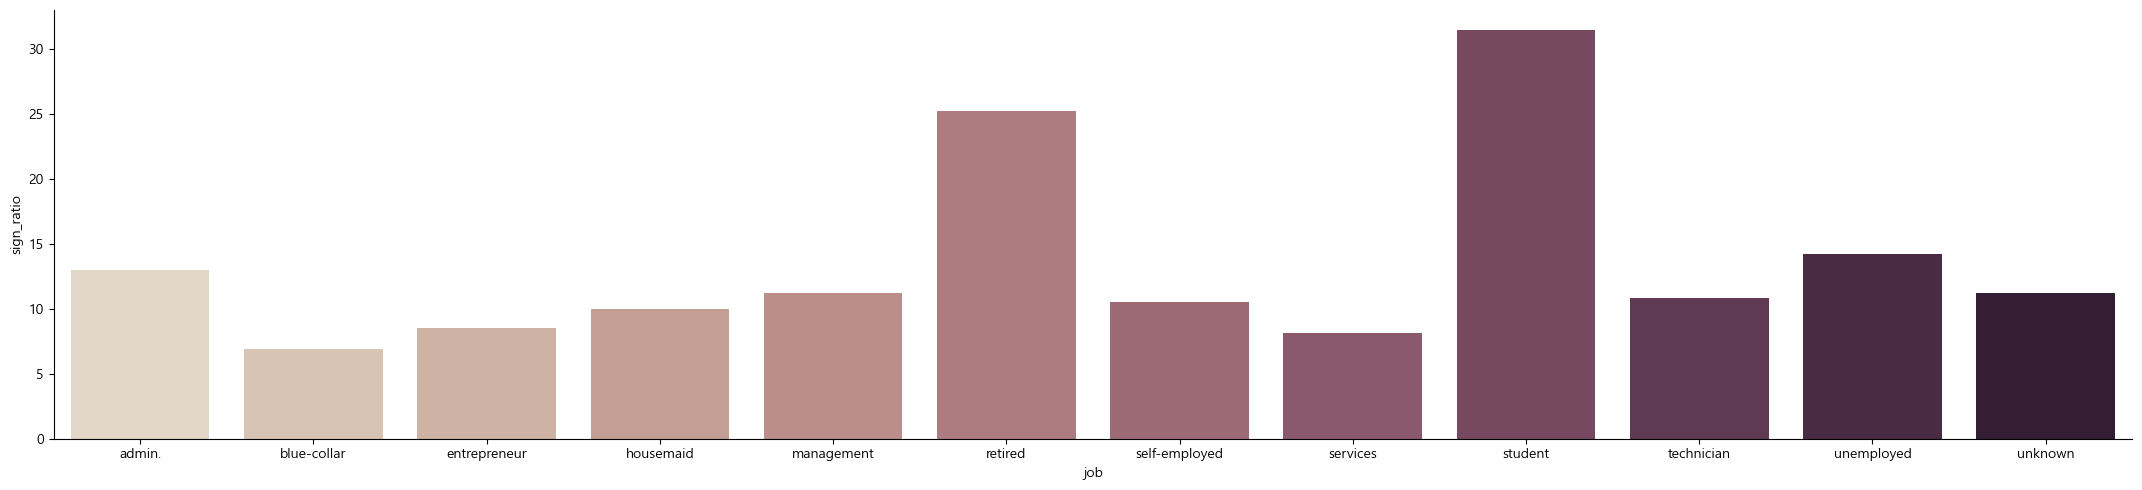

In [25]:
sns.catplot(x="job", y="sign_ratio", kind='bar', palette="ch:.25", data=df_job);
plt.rc('xtick', labelsize=20)
plt.gcf().set_size_inches(25, 5)

Student(학생)의 가입률이 가장 높고, 뒤이어 retired(은퇴 고객)의 가입률이 높은 것을 확인할 수 있다

In [33]:
i = 'job'

df_gp=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
df_gp.columns=['cnt']
df_gp=df_gp.reset_index()

df_gp = pd.pivot_table(df_gp,              
                        index = i,         
                        columns = 'y',     
                        values = 'cnt')    

df_gp = df_gp.reset_index()

df_gp['sign_ratio'] =   round((df_gp['yes'] / (df_gp['yes'] + df_gp['no'])) * 100,1)

df_gp=df_gp.sort_values(by=['sign_ratio'], ascending=False)
df_gp

y,job,no,yes,sign_ratio
8,student,600,275,31.4
5,retired,1286,434,25.2
10,unemployed,870,144,14.2
0,admin.,9070,1352,13.0
4,management,2596,328,11.2
11,unknown,293,37,11.2
9,technician,6013,730,10.8
6,self-employed,1272,149,10.5
3,housemaid,954,106,10.0
2,entrepreneur,1332,124,8.5


Student(학생)의 가입률이 가장 높은 것을 확인할 수 있다

In [34]:
i = 'marital'

df_gp=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
df_gp.columns=['cnt']
df_gp=df_gp.reset_index()

df_gp = pd.pivot_table(df_gp,              
                        index = i,         
                        columns = 'y',     
                        values = 'cnt')    

df_gp = df_gp.reset_index()

df_gp['sign_ratio'] =   round((df_gp['yes'] / (df_gp['yes'] + df_gp['no'])) * 100,1)

df_gp=df_gp.sort_values(by=['sign_ratio'], ascending=False)
df_gp

y,marital,no,yes,sign_ratio
3,unknown,68,12,15.0
2,single,9948,1620,14.0
0,divorced,4136,476,10.3
1,married,22396,2532,10.2


unknown(결혼 상태 모름)의 가입률이 가장 높은 것을 확인할 수 있다

In [35]:
i = 'education'

df_gp=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
df_gp.columns=['cnt']
df_gp=df_gp.reset_index()

df_gp = pd.pivot_table(df_gp,              
                        index = i,         
                        columns = 'y',     
                        values = 'cnt')    

df_gp = df_gp.reset_index()

df_gp['sign_ratio'] =   round((df_gp['yes'] / (df_gp['yes'] + df_gp['no'])) * 100,1)

df_gp=df_gp.sort_values(by=['sign_ratio'], ascending=False)
df_gp

y,education,no,yes,sign_ratio
4,illiterate,14,4,22.2
7,unknown,1480,251,14.5
6,university.degree,10498,1670,13.7
5,professional.course,4648,595,11.3
3,high.school,8484,1031,10.8
0,basic.4y,3748,428,10.2
1,basic.6y,2104,188,8.2
2,basic.9y,5572,473,7.8


illiterate(글을 잘 모름 = 교육수준이 낮음)의 가입률이 가장 높은 것을 확인할 수 있다

In [36]:
i = 'default'

df_gp=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
df_gp.columns=['cnt']
df_gp=df_gp.reset_index()

df_gp = pd.pivot_table(df_gp,              
                        index = i,         
                        columns = 'y',     
                        values = 'cnt')    

df_gp = df_gp.reset_index()

df_gp['sign_ratio'] =   round((df_gp['yes'] / (df_gp['yes'] + df_gp['no'])) * 100,1)

df_gp=df_gp.sort_values(by=['sign_ratio'], ascending=False)
df_gp

y,default,no,yes,sign_ratio
0,no,28391.0,4197.0,12.9
1,unknown,8154.0,443.0,5.2
2,yes,3.0,NaN,NaN


no(신용카드 없음)의 가입률이 가장 높은 것을 확인할 수 있다

In [37]:
i = 'housing'

df_gp=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
df_gp.columns=['cnt']
df_gp=df_gp.reset_index()

df_gp = pd.pivot_table(df_gp,              
                        index = i,         
                        columns = 'y',     
                        values = 'cnt')    

df_gp = df_gp.reset_index()

df_gp['sign_ratio'] =   round((df_gp['yes'] / (df_gp['yes'] + df_gp['no'])) * 100,1)

df_gp=df_gp.sort_values(by=['sign_ratio'], ascending=False)
df_gp

y,housing,no,yes,sign_ratio
2,yes,19069,2507,11.6
0,no,16596,2026,10.9
1,unknown,883,107,10.8


yes(주택 소유)의 가입률이 가장 높은 것을 확인할 수 있다

In [38]:
i = 'loan'

df_gp=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
df_gp.columns=['cnt']
df_gp=df_gp.reset_index()

df_gp = pd.pivot_table(df_gp,              
                        index = i,         
                        columns = 'y',     
                        values = 'cnt')    

df_gp = df_gp.reset_index()

df_gp['sign_ratio'] =   round((df_gp['yes'] / (df_gp['yes'] + df_gp['no'])) * 100,1)

df_gp=df_gp.sort_values(by=['sign_ratio'], ascending=False)
df_gp

y,loan,no,yes,sign_ratio
0,no,30100,3850,11.3
2,yes,5565,683,10.9
1,unknown,883,107,10.8


no(대출 없음)의 가입률이 가장 높은 것을 확인할 수 있다

In [39]:
i = 'contact'

df_gp=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
df_gp.columns=['cnt']
df_gp=df_gp.reset_index()

df_gp = pd.pivot_table(df_gp,              
                        index = i,         
                        columns = 'y',     
                        values = 'cnt')    

df_gp = df_gp.reset_index()

df_gp['sign_ratio'] =   round((df_gp['yes'] / (df_gp['yes'] + df_gp['no'])) * 100,1)

df_gp=df_gp.sort_values(by=['sign_ratio'], ascending=False)
df_gp

y,contact,no,yes,sign_ratio
0,cellular,22291,3853,14.7
1,telephone,14257,787,5.2


cellular(휴대폰)의 가입률이 가장 높은 것을 확인할 수 있다

In [40]:
i = 'month'

df_gp=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
df_gp.columns=['cnt']
df_gp=df_gp.reset_index()

df_gp = pd.pivot_table(df_gp,              
                        index = i,         
                        columns = 'y',     
                        values = 'cnt')    

df_gp = df_gp.reset_index()

df_gp['sign_ratio'] =   round((df_gp['yes'] / (df_gp['yes'] + df_gp['no'])) * 100,1)

df_gp=df_gp.sort_values(by=['sign_ratio'], ascending=False)
df_gp

y,month,no,yes,sign_ratio
5,mar,270,276,50.5
2,dec,93,89,48.9
9,sep,314,256,44.9
8,oct,403,315,43.9
0,apr,2093,539,20.5
1,aug,5523,655,10.6
4,jun,4759,559,10.5
7,nov,3685,416,10.1
3,jul,6525,649,9.0
6,may,12883,886,6.4


mar(3월)의 가입률이 가장 높은 것을 확인할 수 있다

In [41]:
i = 'day_of_week'

df_gp=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
df_gp.columns=['cnt']
df_gp=df_gp.reset_index()

df_gp = pd.pivot_table(df_gp,              
                        index = i,         
                        columns = 'y',     
                        values = 'cnt')    

df_gp = df_gp.reset_index()

df_gp['sign_ratio'] =   round((df_gp['yes'] / (df_gp['yes'] + df_gp['no'])) * 100,1)

df_gp=df_gp.sort_values(by=['sign_ratio'], ascending=False)
df_gp

y,day_of_week,no,yes,sign_ratio
2,thu,7578,1045,12.1
3,tue,7137,953,11.8
4,wed,7185,949,11.7
0,fri,6981,846,10.8
1,mon,7667,847,9.9


thu(목요일)의 가입률이 가장 높은 것을 확인할 수 있다

In [42]:
i = 'poutcome'

df_gp=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
df_gp.columns=['cnt']
df_gp=df_gp.reset_index()

df_gp = pd.pivot_table(df_gp,              
                        index = i,         
                        columns = 'y',     
                        values = 'cnt')    

df_gp = df_gp.reset_index()

df_gp['sign_ratio'] =   round((df_gp['yes'] / (df_gp['yes'] + df_gp['no'])) * 100,1)

df_gp=df_gp.sort_values(by=['sign_ratio'], ascending=False)
df_gp

y,poutcome,no,yes,sign_ratio
2,success,479,894,65.1
0,failure,3647,605,14.2
1,nonexistent,32422,3141,8.8


success(이전 마케팅 성공)의 가입률이 가장 높은 것을 확인할 수 있다

이번에는 도수분포표를 통해 위와 같이 범주형 변수에 대해서 가입률 비교를 모두 진행한다. 평균 가입률이 약 11%이므로 이보다 높은 가입률을 보이는 변수들을 주의깊게 살펴봐야한다. job, education, month, poutcome이 10%대를 넘는 가입률을 나타내고 있다. 예를 들어, poutcome 변수에서 success한 고객들의 가입률이 약 65%이므로 해당 고객들을 대상으로 집중 마케팅을 실시해봐도 좋을 듯 하다.

In [60]:
numeric_list=[]
categorical_list=[]

for i in df.columns :
    if df[i].dtypes == 'O' :
        categorical_list.append(i)
    else :
        numeric_list.append(i)

In [62]:
categorical_list.remove('y')

'y'는 예측 값이기 때문에 list에서 삭제한다

In [63]:
for i in categorical_list :
    df_job=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
    df_job.columns=['cnt']
    df_job=df_job.reset_index()

    df_job = pd.pivot_table(df_job,        
                      index = i,         
                      columns = 'y',    
                      values = 'cnt')    

    df_job = df_job.reset_index()
  
    df_job['sign_ratio'] =   round((df_job['yes'] / (df_job['yes'] + df_job['no'])) * 100,1)

    df_job=df_job.sort_values(by=['sign_ratio'], ascending=False)

    print(df_job.iloc[0:1,:])
    print('')

y      job   no  yes  sign_ratio
8  student  600  275        31.4

y  marital  no  yes  sign_ratio
3  unknown  68   12        15.0

y   education  no  yes  sign_ratio
4  illiterate  14    4        22.2

y default       no     yes  sign_ratio
0      no  28391.0  4197.0        12.9

y housing     no   yes  sign_ratio
2     yes  19069  2507        11.6

y loan     no   yes  sign_ratio
0   no  30100  3850        11.3

y   contact     no   yes  sign_ratio
0  cellular  22291  3853        14.7

y month   no  yes  sign_ratio
5   mar  270  276        50.5

y day_of_week    no   yes  sign_ratio
2         thu  7578  1045        12.1

y poutcome   no  yes  sign_ratio
2  success  479  894        65.1



Feature별 가입률이 가장 높은 행에 대해서만 출력한다

In [64]:
df_rule = df[ (df['job'] == 'student') |
#(df['marital'] == 'unknown') |
#(df['education'] == 'illiterate') |
#(df['default'] == 'no') |
#(df['housing'] == 'yes') |
#(df['loan'] == 'no') |
(df['contact'] == 'cellular') |
(df['month'] == 'mar') |
(df['day_of_week'] == 'thu') |
(df['poutcome'] == 'success') ]

위에서 평균 가입률보다 높았던 조건을 OR조건으로 새로운 Rule을 정의한다. 모든 경우의 수를 포함하는 것과 하나씩 줄여가면서 경우의 수를 비교 분석해서 가입률이 가장 높은 조건들만 그대로 둔다.

In [65]:
df_rule['y'].value_counts()

no     25143
yes     4091
Name: y, dtype: int64

In [66]:
print("Rule base 가입률 : ", round(4091 / (4091 + 25143),2))

Rule base 가입률 :  0.14


Rule base 기반 상품 가입 예측 결과, 평균 가입률(약 11%)보다 3% 높은 14%정도의 가입률을 보인다

## ML 활용 상품 가입 예측

In [6]:
import numpy as np
df['y']=np.where(df['y']=='yes', 1, 0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,nr.employed_gp
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['duration','y'], axis=1)
Y=df['y']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(28831, 19)
(28831,)
(12357, 19)
(12357,)


In [70]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_list:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

범주형 변수는 One-hot-encoding 또는 Label-encoding을 통해 숫자형 변수로 변경해야한다. One-hot-encoding은 차원이 많은 변수에는 적절하지 않고, Label-encoding은 회귀관련 알고리즘에서는 사용이 어렵다. 해당 데이터는 차원이 많은 변수가 있으며 분류분석이기 때문에 Label-encoding을 사용한다 

In [72]:
x_train[categorical_list]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
32810,7,0,3,0,2,0,0,6,1,1
8054,9,1,3,0,0,0,1,4,1,1
11021,0,0,6,0,2,0,1,4,4,1
15650,0,1,3,0,2,0,0,3,1,1
11471,1,1,0,1,0,0,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...
24680,9,1,6,0,0,0,0,7,1,1
26832,0,0,6,0,2,0,1,7,2,1
34518,1,2,2,0,0,0,0,6,2,1
9223,0,1,3,1,1,1,1,4,0,1


In [73]:
x_test[categorical_list]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
32692,1,1,2,1,0,0,0,6,1,1
22287,0,1,6,0,0,0,0,1,2,1
9369,9,1,5,1,2,0,1,4,0,1
38356,0,1,6,0,0,0,0,8,0,0
1150,1,1,2,1,0,0,1,6,2,1
...,...,...,...,...,...,...,...,...,...,...
39997,11,2,6,0,2,0,0,4,4,1
30270,0,1,6,0,2,0,0,0,2,1
33578,1,2,5,0,0,0,0,6,3,1
9664,1,1,2,0,0,0,1,4,1,1


In [74]:
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state=2023)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25583
           1       0.99      0.97      0.98      3248

    accuracy                           1.00     28831
   macro avg       0.99      0.98      0.99     28831
weighted avg       1.00      1.00      1.00     28831

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10965
           1       0.53      0.29      0.37      1392

    accuracy                           0.89     12357
   macro avg       0.72      0.63      0.66     12357
weighted avg       0.87      0.89      0.88     12357



1. precision  

- 예금 가입을 할 것 같은 고객들을 예측한 고객들 중에서 실제로 예금 가입을 한 고객의 확률

- 장점 : 최대한 많은 예금 가입 고객들을 후보리스트로 만들어서 관리가 가능하며, 이익을 극대화 시킬 수 있다.

- 단점 : 실제로 그렇지 않은 고객들이 포함될 수 있다.


2. recall  

- 실제로 예금 가입을 한 고객들중에서 예금 가입 예측을 맞춘 확률

- 장점 : 실제로 예금 가입을 할것같은 고객들만 관리할 수 있다.

- 단점 : 예금 가입 고객들이 적어서 모수가 작아지기 때문에 이익이 적어질 우려가 있다.  

3. 과적합

- train과 test의 precision이 비슷하면 과적합이 발생하지 않은 것이고, 위와 같이 크게 차이가 나면 과적합이 발생한 것이라고 볼 수 있다.

- 이러한 경우, 과적합을 방지하기 위해 Hyper parameter 튜닝을 통해 해결할 수 있다. 

In [75]:
pd.Series(y_pred_test).value_counts()

0    11595
1      762
dtype: int64

In [76]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [400],
           'max_depth' : [6, 8, 10]
            }

rf_clf = RandomForestClassifier(random_state = 2023, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1, scoring='precision')
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'n_estimators': 400}
최고 예측 정확도: 0.6985


위의 n_jobs가 -1이면 컴퓨터의 모든 코어를 사용한다는 의미이다

scoring을 precision으로 선택한 이유는 고객들의 수가 상당히 많기 때문에 최대한 이익을 극대화하는 것이 더욱 좋을 것 같다는 판단이 들어서다

In [77]:
rfc = RandomForestClassifier(n_estimators=400, max_depth=6, random_state = 2023)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     25583
           1       0.75      0.22      0.34      3248

    accuracy                           0.90     28831
   macro avg       0.83      0.61      0.65     28831
weighted avg       0.89      0.90      0.88     28831

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10965
           1       0.67      0.20      0.31      1392

    accuracy                           0.90     12357
   macro avg       0.79      0.60      0.63     12357
weighted avg       0.88      0.90      0.87     12357



최적의 하이퍼 파라미터를 통해 다시 랜덤포레스트를 학습시킨 결과, train의 precision이 0.75이고 test의 precision이 0.67으로 이전보다 정확하게 예측을 했다고 할 수 있다. 과적합이 어느 정도 해결되었다고 할 수 있다.

In [78]:
pd.Series(y_pred_test).value_counts()

0    11937
1      420
dtype: int64

ML 활용 상품 가입 예측 결과, 평균 가입률(11%)보다 56%높은 67%정도의 가입률을 보여준다. 가입률만 본다면 ML 활용 상품 가입 예측 결과가 Rule base 기반 상품 가입 예측 결과보다 훨씬 좋지만, 고객의 수도 자세히 볼 필요가 있다.  

Rule base 기반 분석은 약 3만명 중의 4천명이 가입을 하고, ML 활용 분석은 420명 중의 67%인 약 280명이 가입을 한다.이렇듯 280명의 가입 고객들을 얻기 위해 타겟 마케팅을 진행하기는 다소 무리가 있어보인다. 오히려 4천명의 가입 고객을 얻기 위해 타켓 마케팅을 진행하는 것이 좋아보인다. 하지만, 마케팅 비용 측면도 고려한다면 소수의 고객을 유치하는 것도 좋을 듯 하다.

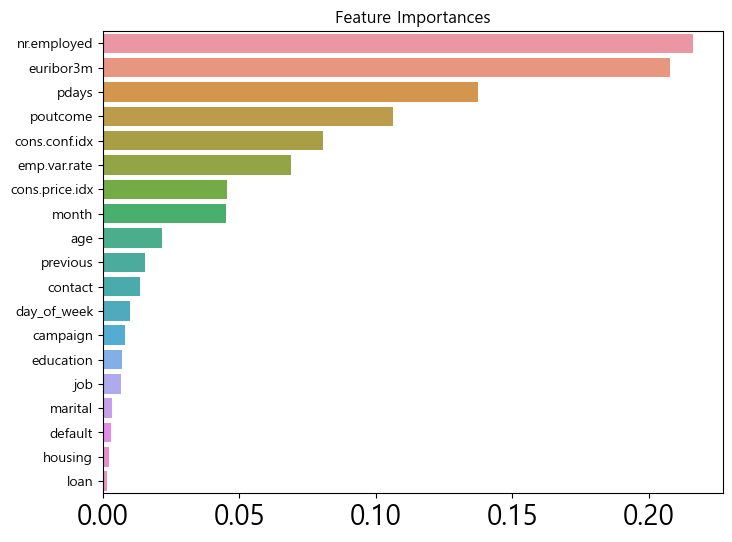

In [79]:
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

Feature IMP 분석을 통해 중요변수를 파악한다. 위의 상위 변수들이 직원수, 경제지표와 관련한 변수들이기 때문에 고객의 개별적인 성향들보다 예금 가입률에 미치는 영향이 더욱 중요하다고 해석할 수 있다. 앞으로 경제상황을 예측하긴 힘들겠지만, 어느정도 예측하고 반영해서 마케팅을 진행하는 것이 필요해 보인다. 

marital, default, housing, loan 변수들은 크게 중요하지 않은 변수들이기에 제거하고 다시 모델링을 해보는 것도 좋다. 

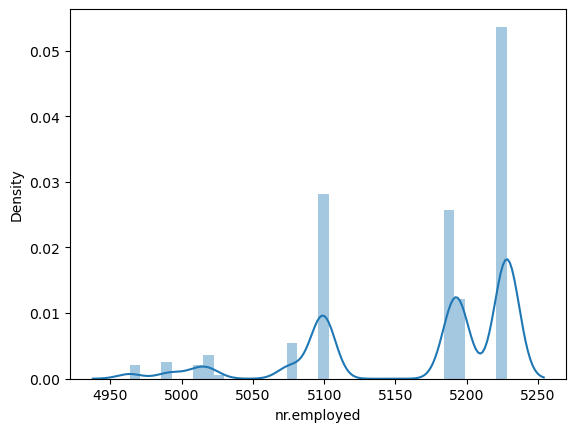

In [2]:
import seaborn as sns

sns.distplot(df['nr.employed']);

가장 중요한 변수에 대해 상세한 탐색을 실시한다. nr.employed(직원 수)의 분포를 확인한다

In [8]:
import numpy as np
df['nr.employed_gp'] = np.where (df['nr.employed'] <= 5100, 1, 
                           np.where(df['nr.employed'] <= 5200, 2, 3))

df[['nr.employed','nr.employed_gp']]

,nr.employed,nr.employed_gp
0,5191.0,2
1,5191.0,2
2,5191.0,2
3,5191.0,2
4,5191.0,2
...,...,...
41183,4963.6,1
41184,4963.6,1
41185,4963.6,1
41186,4963.6,1


5100과 5200을 기준으로 측정하고 3개의 구간으로 구간화를 진행한다

In [9]:
df.groupby(['nr.employed_gp', 'y'])['nr.employed_gp'].count()

nr.employed_gp  y
1               0    10197
                1     3301
2               0    10983
                1      473
3               0    15368
                1      866
Name: nr.employed_gp, dtype: int64

In [10]:
print("gp1 :", (3301 / (10197+3301)) * 100)
print("gp2 :", (473 / (10983+473)) * 100)
print("gp3 :", (866 / (15368+866)) * 100)

gp1 : 24.455474885168176
gp2 : 4.1288407821229045
gp3 : 5.334483183442158


직원 수가 적을수록 예금 가입 확률이 급격히 상승하는 것을 확인할 수 있다. 가장 중요한 변수임을 알 수 있고, 매우 주의깊게 살펴봐야한다

성과측정은 기본 베이스 코드(위의 전체 코드)를 가지고 익월 데이터를 추가 업로드해서 성과비교가 필요하다. 예를 들어, 위의 데이터로 예측한 예금 가입 고객들을 정기예금 가입률로 익월과 비교하는 것이다.

ex) 예금 가입 예측 고객 = gp1의 고객들(직원 수가 5100명 이하인 은행의 고객들)